
Assignment 5 Exercise 2: Curve fitting using scipy.optimize package

The following scripts determine the optimized values of specified parameters in varying equations using the built in scipy functions in the optimize package. For codes a, c, and d the chi^2 value is calculated within a function using the expected values from the provided data sets (in text files) and the observed values calculated from and initial guess and the provided equations. The chi^2 value is then minimized with the minimize function from the optimize package. For code e the data is fit using curve fit to the provided function and using the provided data set (in a text file).

@Author: Manisha Gupta (UCID: 10170550)

In [1]:
# Exercise 2a+b: Finds optimized values of slope and intercept for the linear equation and graphs the data set with the fit

# Import the libraries that will be needed for this script 
import matplotlib.pylab as plt
import numpy as np
import math
from scipy import optimize

# Reads the data from the data file into numpy arrays and converts them to floats 
def read_file(file):
    with open(file, 'r') as data:
        x = np.array([])
        y = np.array([])
        for line in data:
            l = line.split()
            x = np.append(x, [float(l[0])])
            y = np.append(y, [float(l[1])])

    return x, y

# Calls function to read in x and y data points from the file "data_points_assign5.txt"
x_data, y_data = read_file('data_points_assign5.txt')

# Function uses the equation with the inital guess for slope and intercept, as well as the data set to be 
# fitted to calculate and return reduced chi^2
def linear_model(param, x, y):
    chi_2 = 0                   # Creates a variable for chi^2 to be stored 
    num_data = 0                # Creates a variable to count the number of data points
    slope, intercept = param
    # Calculates the expected and observed values for each data point for calculation of chi^2
    for i in range(len(x)): 
        num_data = num_data + 1
        result = slope * x[i] + intercept
        chi_2 = chi_2 + (((y[i] - result) / 1)**2)
    reduced_chi_2 = chi_2 / num_data   # Calculates reduced chi^2 using chi^2 and number of data points      
    return reduced_chi_2

# Assigns the inital guess to be used in the minimization 
param = 1.2,0.5

# Performs the minimization on reduced chi^2 using the Nelder-Mead minimize method from the optimize package
result = optimize.minimize(linear_model, param, (x_data,y_data), method='Nelder-Mead')

# Stores optimized values of slope and intercept
slope_opt, intercept_opt = result.x
# Creates numpy array to store new y data
y_opt = np.array([])

# Calculates the new y data using the optimized slope and intercept
for i in range(len(x_data)):
    y_val = slope_opt * x_data[i] + intercept_opt
    y_opt = np.append(y_opt, [y_val])
    
print("Optimized Slope: ", slope_opt, "\nOptimized Intercept: ", intercept_opt)    
    
# Plots the initial data points in red and the linear model with the optimized slope and intercept in blue
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, y_opt, 'b-')
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Data Points(red) and Parametrized Line (blue) for a Linear Model")
plt.grid()
plt.show()


Optimized Slope:  1.4659495143185073 
Optimized Intercept:  0.3643416978386599


<Figure size 640x480 with 1 Axes>

Figure 2.1

This figure is the plot of the linear model with original data points in red and parametrized line, using the optimized slope and intercept from the minimize function, in blue. The script provided the intial guess values for slope and intercept to be 1.2 and 0.5 respectively, and the minimize scipy function found the optimized values for slope and intercept to be 1.466 and 0.364 respectively. As can be seen in the plot the optimized values do provide a good linear fit for the data, as the line has equal spacing above and below from points in the data set.

Optimized D:  2.2925657695637582 
Optimized b:  0.4962795072964685


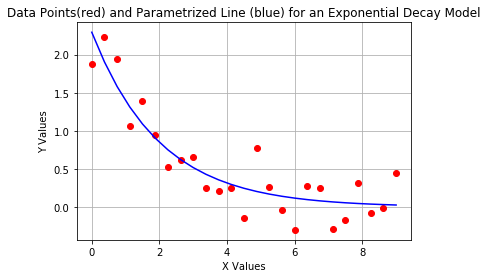

In [2]:
# Exercise 2c: Finds optimized values of D and b for the exponential decay equation and graphs the data set with the fit

# Import the libraries that will be needed for this script 
import matplotlib.pylab as plt
import numpy as np
import math
from scipy import optimize

# Reads the data from the data file into numpy arrays and converts them to floats 
def read_file(file):
    with open(file, 'r') as data:
        x = np.array([])
        y = np.array([])
        for line in data:
            l = line.split()
            x = np.append(x, [float(l[0])])
            y = np.append(y, [float(l[1])])

    return x, y

# Calls function to read in x and y data points from the file "data_points_exp_assign5.txt"
x_data, y_data = read_file('data_points_exp_assign5.txt')

# Function uses the equation with the inital guess for initial amount and decay rate, as well as the data set to be 
# fitted to calculate and return reduced chi^2
def exponential_decay_model(param, x, y):
    chi_2 = 0                   # Creates a variable for chi^2 to be stored
    num_data = 0                # Creates a variable to count the number of data points
    D, b = param
    # Calculates the expected and observed values for each data point for calculation of chi^2
    for i in range(len(x)):
        num_data = num_data + 1
        result = D * math.exp(-b * x[i])
        chi_2 = chi_2 + (((y[i] - result) / 1)**2)
    reduced_chi_2 = chi_2 / num_data   # Calculates reduced chi^2 using chi^2 and number of data points    
    return reduced_chi_2

# Assigns the inital guess to be used in the minimization 
param = 1.2,0.5

# Performs the minimization on reduced chi^2 using the Nelder-Mead minimize method from the optimize package
result = optimize.minimize(exponential_decay_model, param, (x_data,y_data), method='Nelder-Mead')

# Stores optimized values of D and b
D_opt, b_opt = result.x
# Creates numpy array to store new y data
y_opt = np.array([])

# Calculates the new y data using the optimized inital amount and decay rate
for i in range(len(x_data)):
    y_val = D_opt * math.exp(-b_opt * x_data[i])
    y_opt = np.append(y_opt, [y_val])

print("Optimized D: ", D_opt, "\nOptimized b: ", b_opt)     
    
# Plots the initial data points in red and the exponential model with the optimized D and b in blue
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, y_opt, 'b-')
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Data Points(red) and Parametrized Line (blue) for an Exponential Decay Model")
plt.grid()
plt.show()


Figure 2.2

This figure is the plot of the exponential decay model with original data points in red and parametrized line, using the optimized D (initial amount) and b (decay rate) from the minimize function, in blue. The script provided the intial guess values for D and b to be same as the linear model, 1.2 and 0.5 respectively, and the minimize scipy function found the optimized values for slope and intercept to be 2.293 and 0.496 respectively. As can be seen in the plot the optimized values do provide a good exponential fit for the data, as the line has equal spacing above and below from points in the data set.

Half life of Barium-137:  2.836203030895497 min


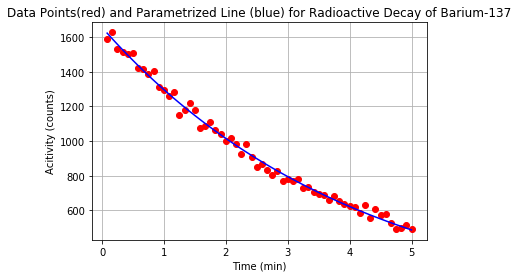

In [3]:
# Exercise 2d: Finds value of half-life for the radioactve decay equation of Barium-137 and graphs the data set with the fit

# Import the libraries that will be needed for this script 
import matplotlib.pylab as plt
import numpy as np
import math
from scipy import optimize

# Reads the data from the data file into numpy arrays and converts them to floats 
def read_file(file):
    with open(file, 'r') as data:
        x = np.array([])
        y = np.array([])
        for line in data:
            l = line.split()
            x = np.append(x, [float(l[0])])
            y = np.append(y, [float(l[1])])

    return x, y

# Calls function to read in t and N data points from the file "decay.txt"
t_data, N_data = read_file('decay.txt')

# Function uses the equation with the inital guess for initial count and half-life, as well as the data set to be 
# fitted to calculate and return reduced chi^2
def radioactive_decay_model(param, t, N):
    chi_2 = 0                   # Creates a variable for chi^2 to be stored
    num_data = 0                # Creates a variable to count the number of data points
    N_0, t_half = param
    # Calculates the expected and observed values for each data point for calculation of chi^2
    for i in range(len(t)):
        num_data = num_data + 1
        result = N_0 * math.exp(-t[i] / (t_half / math.log(2)))
        chi_2 = chi_2 + (((N[i] - result) / 1)**2)
    reduced_chi_2 = chi_2 / num_data   # Calculates reduced chi^2 using chi^2 and number of data points    
    return reduced_chi_2

# Assigns the inital guess to be used in the minimization 
param = 1.2,0.5

# Performs the minimization on reduced chi^2 using the Nelder-Mead minimize method from the optimize package
result = optimize.minimize(radioactive_decay_model, param, (t_data,N_data), method='Nelder-Mead')

# Stores optimized values of N_0 and t_half
N_0_opt, t_half_opt = result.x
# Creates numpy array to store new N data
N_opt = np.array([])

# Calculates the new N data using the optimized inital count and half-life
for i in range(len(t_data)):
    y_val = N_0_opt * math.exp(-t_data[i] / (t_half_opt / math.log(2)))
    N_opt = np.append(N_opt, [y_val])

print("Half life of Barium-137: ", t_half_opt, "min")     
    
# Plots the initial data points in red and the radioactive decay model with the optimized N_0 and t_half in blue
plt.plot(t_data, N_data, 'ro')
plt.plot(t_data, N_opt, 'b-')
plt.xlabel("Time (min)")
plt.ylabel("Acitivity (counts)")
plt.title("Data Points(red) and Parametrized Line (blue) for Radioactive Decay of Barium-137")
plt.grid()
plt.show()

Figure 2.3

This figure is the plot of the radioactive decay model for Barium-137 with original data points in red and parametrized line, using the optimized N_0 (initial amount) and half-life from the minimize function, in blue. The script provided the intial guess values for N_0 and half-life to be same as the previous models, 1.2 and 0.5 respectively, and the minimize scipy function found the optimized value for half-life to be 2.836 minutes. As can be seen in the plot the optimized values do provide a good exponential decay fit for the data, as the line has equal spacing above and below from points in the data set.

Fitted value of m*R :  0.03307075584087765 kg*m


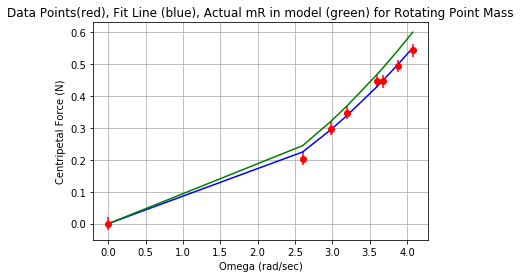

In [4]:
# Exercise 2e: Finds value mR for the quadratic equation of a rotating point mass and graphs the data set with the fit

# Import the libraries that will be needed for this script 
import matplotlib.pylab as plt
import numpy as np
import math
from scipy import optimize

# Reads the data from the data file into numpy arrays and converts them to floats 
def read_file(file):
    with open(file, 'r') as data:
        x = np.array([])
        y = np.array([])
        z = np.array([])
        next(data) # skips first line of data file
        for line in data:
            l = line.split()
            x = np.append(x, [float(l[0])])
            y = np.append(y, [float(l[1])])
            z = np.append(z, [float(l[2])])

    return x, y, z

# Calls function to read in omega, force, and error for force data from the file "centripetal.txt"
omega_data, force_data, error_F = read_file('centripetal.txt')

# Function returns the equation for the rotating point mass
def rotating_pt_mass(omega, mR):
    return mR * (omega**2)

# Performs the fit on the rotating point mass function using the curve_fit method from the optimize package
result = optimize.curve_fit(rotating_pt_mass, omega_data, force_data)
mR, pcov = result

# Creates numpy array to store quadratic model data
model_F = np.array([])
# Order omega data for easier model plotting
omega_data_ordered = omega_data[omega_data.argsort()]

# Calculates the new force data using the optimized mR data
for i in range(len(omega_data_ordered)):
    y_val = mR * ((omega_data_ordered[i])**2)
    model_F = np.append(model_F, [y_val])
    
# Creates numpy array to store quadratic model data
real_F = np.array([])
real_mR = 0.2 * 0.18

# Calculates the force data using the actual mR data
for i in range(len(omega_data_ordered)):
    y_val = real_mR * ((omega_data_ordered[i])**2)
    real_F = np.append(real_F, [y_val])
    
print("Fitted value of m*R : ", mR[0], "kg*m")  
    
# Plots the initial data points in red with error bars, the quad model with the fitted mR in blue, and quad model with actual mR
# in green
plt.errorbar(omega_data, force_data, yerr = error_F, fmt = 'ro')
plt.plot(omega_data_ordered, model_F, 'b-')
plt.plot(omega_data_ordered, real_F, 'g-')
plt.xlabel("Omega (rad/sec)")
plt.ylabel("Centripetal Force (N)")
plt.title("Data Points(red), Fit Line (blue), Actual mR in model (green) for Rotating Point Mass")
plt.grid()
plt.show()

Figure 2.4

This figure is the plot of the quadratic model for a rotating point mass with original data points and associated error in red and parametrized line, using the fit value of m\*R (mass multiplied by radius) from the curve fit function, in blue. The curve_fit scipy function found the mR value to be 0.033 kg\*m. As can be seen in the plot the quadratic model for F_c does fit the data provided, as the line has equal spacing above and below from points in the data set and is within the data sets' associated error bars. The green line is found using the actual mR data of mass = 200g and radius = 18cm within the quadratic model for F_c. As can be seen this line is not consistent with the data found from the curve fit as it only intersects with approximately half of the data's associated error bars. From this we can see two possibilities, that the error associated with each data point may not be accurate and that the error needs to have a larger margin so that the data and the model are consistent, or that the model may only reflect perfect outcomes and does not account real-world affects on the experiment and its data. 